In [1]:
#데이터 분석을 위한 pandas, 수치계산을 위한 numpy 라이브러리 로드
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl


In [10]:
sns.__version__

'0.11.1'

In [2]:
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())

버전:  3.3.4
설치 위치:  /usr/local/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/matplotlib/__init__.py
설정 위치:  /Users/jin/.matplotlib
캐시 위치:  /Users/jin/.matplotlib


In [12]:
pd.__version__

'1.2.3'

In [20]:
#시각화를 위한 폰트 설정
def get_font_family():
    import platform
    system_name = platform.system()

    if system_name == "Darwin":
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get update -qq
        !apt-get install fonts-nanum -qq > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothc.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothc"
    return font_family

In [21]:
font_family = get_font_family()
font_family
# import matplotlib.font_manager as fm

'AppleGothic'

In [22]:
# 글씨 선명하게 출력하는 설정
# %config InlineBackend.figure_format = 'retina'
#폰트 설정
plt.rc('font', family=font_family)
# plt.rc('axes', unicode_minus=False)

<AxesSubplot:title={'center':'한글'}>

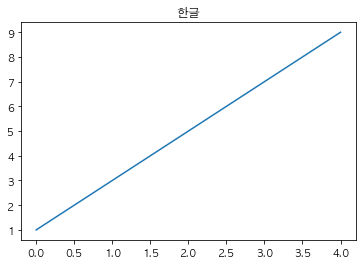

In [23]:
pd.Series([1,3,5,7,9]).plot(title="한글")

In [26]:
df = pd.read_csv('etf_2021-03-09_raw.csv', dtype={"itemcode": object})
df.head()

,itemcode,etfTabCode,itemname,nowVal,risefall,changeVal,changeRate,nav,threeMonthEarnRate,quant,amonut,marketSum
0,069500,1,KODEX 200,41215,5,-260,-0.63,41266.0,14.1995,10741831,441008,51230
1,102110,1,TIGER 200,41040,5,-295,-0.71,41108.0,14.3556,1126933,46126,25629
2,252670,3,KODEX 200선물인버스2X,2215,2,30,1.37,2232.0,-27.0451,494560618,1103961,21893
3,153130,6,KODEX 단기채권,102725,5,-15,-0.01,102729.0,0.1510,7549,775,19141
4,102780,2,KODEX 삼성그룹,9680,5,-120,-1.22,9709.0,9.0100,363691,3505,16901


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   itemcode            474 non-null    object 
 1   etfTabCode          474 non-null    int64  
 2   itemname            474 non-null    object 
 3   nowVal              474 non-null    int64  
 4   risefall            474 non-null    int64  
 5   changeVal           474 non-null    int64  
 6   changeRate          474 non-null    float64
 7   nav                 346 non-null    float64
 8   threeMonthEarnRate  461 non-null    float64
 9   quant               474 non-null    int64  
 10  amonut              474 non-null    int64  
 11  marketSum           474 non-null    int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 44.6+ KB


In [7]:
df.sort_values('quant', ascending=False).head(10)

,itemcode,etfTabCode,itemname,nowVal,risefall,changeVal,changeRate,nav,threeMonthEarnRate,quant,amonut,marketSum
2,252670,3,KODEX 200선물인버스2X,2215,2,30,1.37,2232.0,-27.0451,494560618,1103961,21893
10,114800,3,KODEX 인버스,4030,2,25,0.62,4044.0,-13.7783,93707981,378961,12199
29,251340,3,KODEX 코스닥150선물인버스,4885,2,35,0.72,4930.0,2.1052,73959414,363978,4465
6,122630,3,KODEX 레버리지,25250,5,-345,-1.35,25292.0,28.0390,57182653,1434126,16211
14,233740,1,KODEX 코스닥150 레버리지,13120,5,-140,-1.06,13041.0,-9.7038,17951068,231252,9683
0,069500,1,KODEX 200,41215,5,-260,-0.63,41266.0,14.1995,10741831,441008,51230
75,252710,3,TIGER 200선물인버스2X,2300,2,30,1.32,2311.0,-26.7742,9776084,22610,1210
33,229200,1,KODEX 코스닥 150,13570,5,-90,-0.66,13660.0,-4.0731,4826286,64914,3996
42,091170,2,KODEX 은행,7015,2,160,2.33,7032.0,11.1922,3462456,24256,2546
12,305720,2,KODEX 2차전지산업,17515,5,-635,-3.50,17515.0,28.4046,2544896,44167,11034


In [20]:
df['etfTabCode'].value_counts().sort_index()

1     64
2    179
3     31
4     97
5     14
6     55
7     34
Name: etfTabCode, dtype: int64

In [21]:
df[df['etfTabCode'] == 7]

,itemcode,etfTabCode,itemname,nowVal,risefall,changeVal,changeRate,nav,threeMonthEarnRate,quant,amonut,marketSum
38,357870,7,TIGER CD금리투자KIS(합성),50230,2,5,0.01,50229.0,0.1495,42125,2115,3147
104,182480,7,TIGER 미국MSCI리츠(합성 H),12780,2,205,1.63,NaN,2.6865,25309,322,703
117,261240,7,KODEX 미국달러선물,10110,2,65,0.65,10114.0,4.5809,178524,1803,608
158,261250,7,KODEX 미국달러선물레버리지,9435,2,110,1.18,9453.0,9.1281,331383,3134,327
164,138230,7,KOSEF 미국달러선물,11995,2,60,0.50,12018.0,4.4547,26111,313,299
182,329650,7,KODEX TRF3070,10920,2,30,0.28,10881.0,2.2535,62415,681,251
199,237370,7,KODEX 배당성장채권혼합,11675,5,-40,-0.34,11666.0,4.0408,7160,83,210
207,341850,7,TIGER KIS부동산인프라채권TR,5245,5,-10,-0.19,5251.0,1.5458,8968,47,199
233,183700,7,KBSTAR 채권혼합,63680,5,-115,-0.18,63660.0,4.0446,217,13,153
265,261120,7,TIGER 미국달러선물인버스2X,9555,5,-155,-1.60,9570.0,-8.9119,1072,10,124


In [32]:
(True + True + False) / 3

0.6666666666666666

In [31]:
#결측치 확인
df.isnull().sum()
#NAV 순 자산가치
# threeMonthEarnRate 3개월 수익률

itemcode                0
etfTabCode              0
itemname                0
nowVal                  0
risefall                0
changeVal               0
changeRate              0
nav                   128
threeMonthEarnRate     13
quant                   0
amonut                  0
marketSum               0
dtype: int64

In [35]:
#결측치의 비율
df.isnull().mean() * 100 #백분위

itemcode               0.000000
etfTabCode             0.000000
itemname               0.000000
nowVal                 0.000000
risefall               0.000000
changeVal              0.000000
changeRate             0.000000
nav                   27.004219
threeMonthEarnRate     2.742616
quant                  0.000000
amonut                 0.000000
marketSum              0.000000
dtype: float64

<AxesSubplot:>

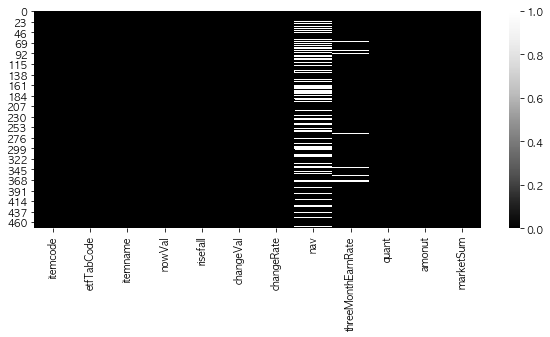

In [40]:
# heatmap을 통한 결측치 시각화
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), cmap="Greys_r")

In [48]:
#범주형 변수 찾기
# df.describe(include=np.object_)
df.describe(exclude=np.number)


,itemcode,itemname
count,474,474
unique,474,474
top,365040,TIGER 인도니프티50레버리지(합성)
freq,1,1
